In [36]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier

#import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

In [37]:
data = pd.read_csv('soyabean_data.csv')

In [38]:
data.tail()

,Year,Loc_Id,Yield,W11,W12,W13,W14,W15,W16,W17,...,P9,P10,P11,P12,P13,P14,S_surface1,S_surface2,S_surface3,S_surface4
3995,2008,104,53.5,2.089286,11.500000,0.000000,0.142857,5.196429,9.910714,2.517857,...,7,10,6,0,0,0,1.75,0.745,0.745125,134.75
3996,2007,104,54.0,2.750000,5.696429,4.303571,0.053571,0.035714,0.803571,2.928571,...,0,0,0,0,0,0,1.75,0.745,0.745125,134.75
3997,2006,104,54.7,0.607143,1.785714,2.696429,0.000000,2.785714,0.035714,3.464286,...,8,0,0,0,0,0,1.75,0.745,0.745125,134.75
3998,2005,104,52.6,10.303571,10.892857,0.250000,0.660714,1.303571,1.767857,4.535714,...,0,0,0,0,0,0,1.75,0.745,0.745125,134.75
3999,2004,104,52.5,4.392857,0.000000,0.750000,0.857143,0.410714,0.660714,0.000000,...,6,1,0,0,0,0,1.75,0.745,0.745125,134.75


In [39]:
data.head()

,Year,Loc_Id,Yield,W11,W12,W13,W14,W15,W16,W17,...,P9,P10,P11,P12,P13,P14,S_surface1,S_surface2,S_surface3,S_surface4
0,2018,1114,62.6,0.011905,1.059524,0.821429,3.369048,0.214286,3.797619,0.476190,...,4,0,0,0,0,0,1.816667,0.818167,0.82475,135.25
1,2017,1114,53.6,0.035714,1.297619,6.559524,0.619048,0.035714,1.964286,0.000000,...,4,0,0,0,0,0,1.816667,0.818167,0.82475,135.25
2,2016,1114,67.5,0.000000,2.214286,0.142857,0.333333,2.083333,0.119048,0.547619,...,6,0,0,0,0,0,1.816667,0.818167,0.82475,135.25
3,2015,1114,61.2,3.071429,0.678571,0.119048,0.416667,4.238095,0.023810,0.000000,...,2,1,2,1,2,2,1.816667,0.818167,0.82475,135.25
4,2014,1114,60.0,2.250000,2.821429,0.880952,0.797619,1.297619,1.095238,1.476190,...,2,2,0,0,0,0,1.816667,0.818167,0.82475,135.25


In [40]:
data

,Year,Loc_Id,Yield,W11,W12,W13,W14,W15,W16,W17,...,P9,P10,P11,P12,P13,P14,S_surface1,S_surface2,S_surface3,S_surface4
0,2018,1114,62.6,0.011905,1.059524,0.821429,3.369048,0.214286,3.797619,0.476190,...,4,0,0,0,0,0,1.816667,0.818167,0.824750,135.25
1,2017,1114,53.6,0.035714,1.297619,6.559524,0.619048,0.035714,1.964286,0.000000,...,4,0,0,0,0,0,1.816667,0.818167,0.824750,135.25
2,2016,1114,67.5,0.000000,2.214286,0.142857,0.333333,2.083333,0.119048,0.547619,...,6,0,0,0,0,0,1.816667,0.818167,0.824750,135.25
3,2015,1114,61.2,3.071429,0.678571,0.119048,0.416667,4.238095,0.023810,0.000000,...,2,1,2,1,2,2,1.816667,0.818167,0.824750,135.25
4,2014,1114,60.0,2.250000,2.821429,0.880952,0.797619,1.297619,1.095238,1.476190,...,2,2,0,0,0,0,1.816667,0.818167,0.824750,135.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,2008,104,53.5,2.089286,11.500000,0.000000,0.142857,5.196429,9.910714,2.517857,...,7,10,6,0,0,0,1.750000,0.745000,0.745125,134.75
3996,2007,104,54.0,2.750000,5.696429,4.303571,0.053571,0.035714,0.803571,2.928571,...,0,0,0,0,0,0,1.750000,0.745000,0.745125,134.75
3997,2006,104,54.7,0.607143,1.785714,2.696429,0.000000,2.785714,0.035714,3.464286,...,8,0,0,0,0,0,1.750000,0.745000,0.745125,134.75
3998,2005,104,52.6,10.303571,10.892857,0.250000,0.660714,1.303571,1.767857,4.535714,...,0,0,0,0,0,0,1.750000,0.745000,0.745125,134.75


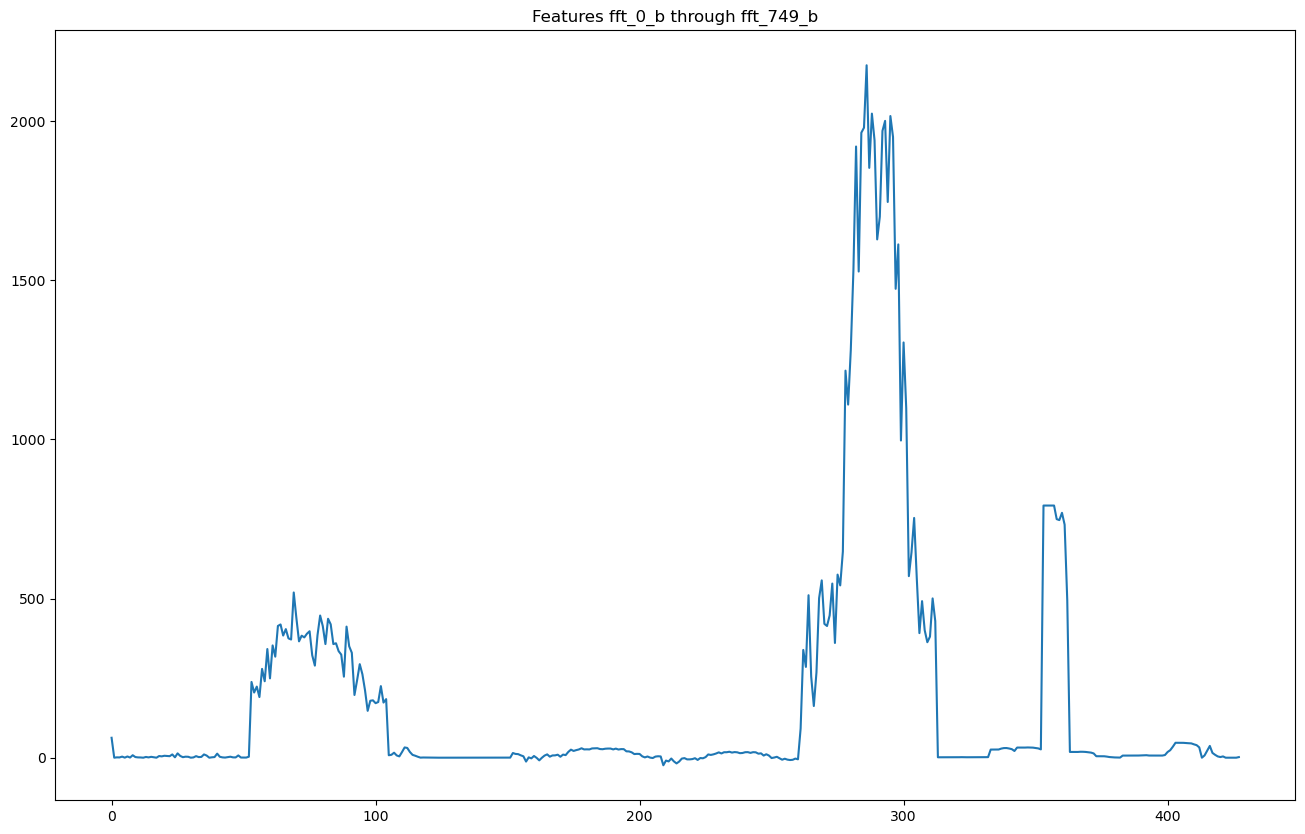

In [41]:
sample = data.loc[0, 'Yield':'S_surface1']

plt.figure(figsize=(16, 10))
plt.plot(range(len(sample)), sample)
plt.title("Features fft_0_b through fft_749_b")
plt.show()

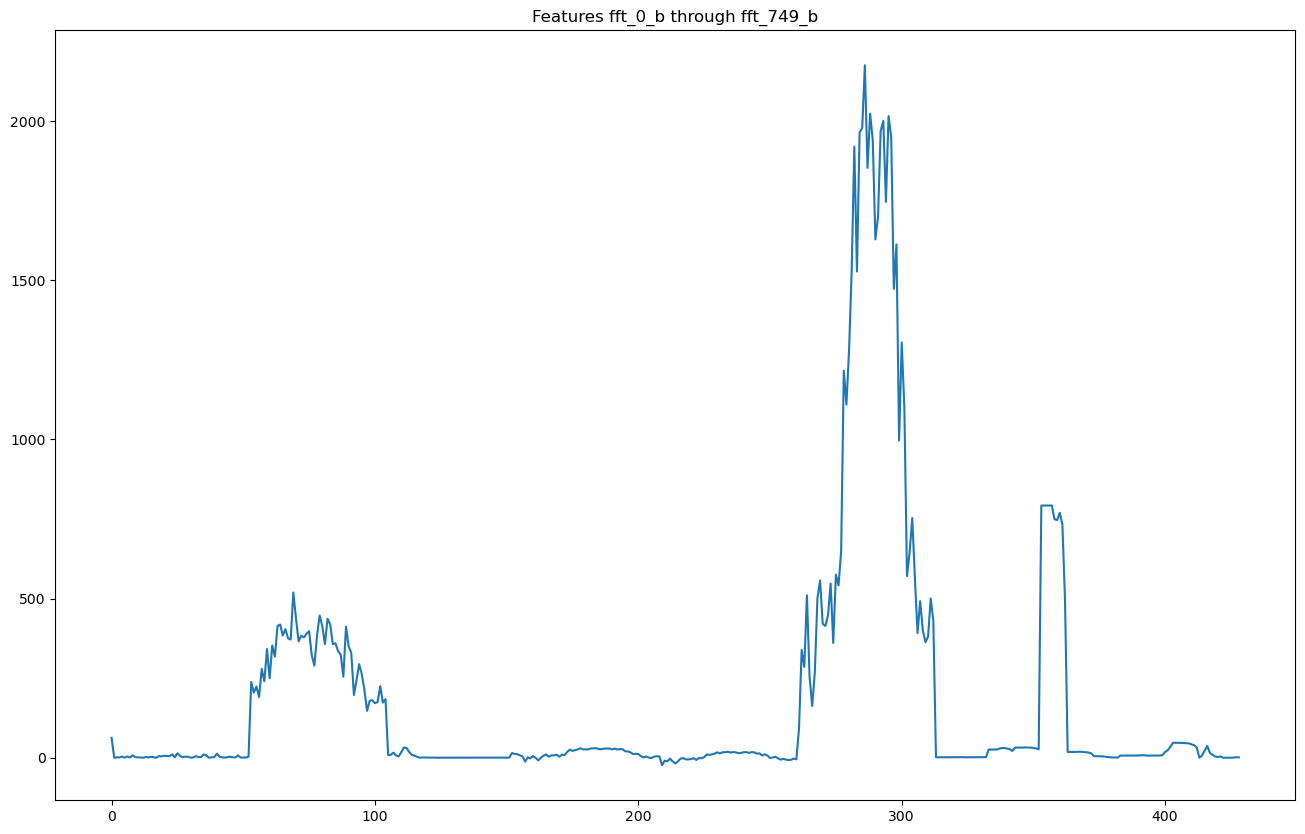

In [42]:
sample = data.loc[0, 'Yield':'S_surface2']

plt.figure(figsize=(16, 10))
plt.plot(range(len(sample)), sample)
plt.title("Features fft_0_b through fft_749_b")
plt.show()

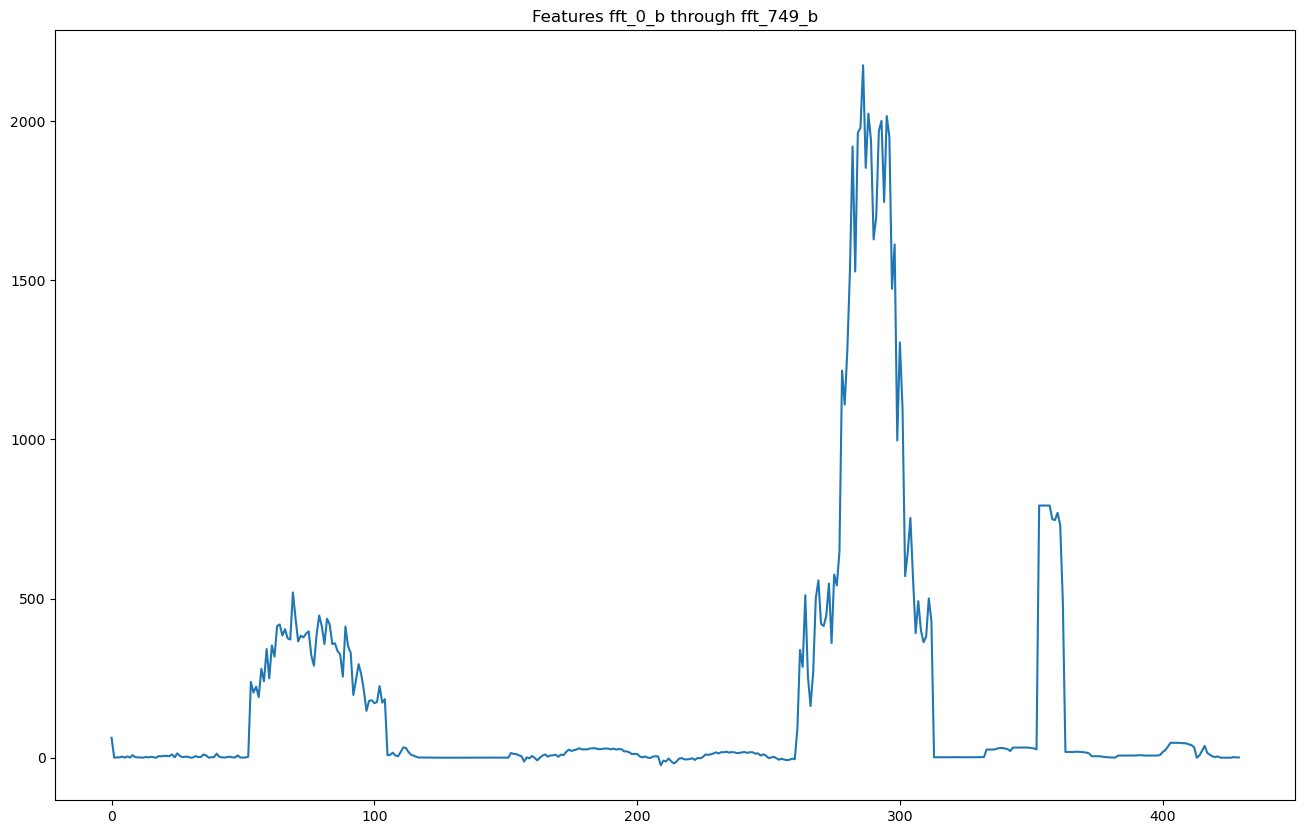

In [43]:
sample = data.loc[0, 'Yield':'S_surface3']

plt.figure(figsize=(16, 10))
plt.plot(range(len(sample)), sample)
plt.title("Features fft_0_b through fft_749_b")
plt.show()

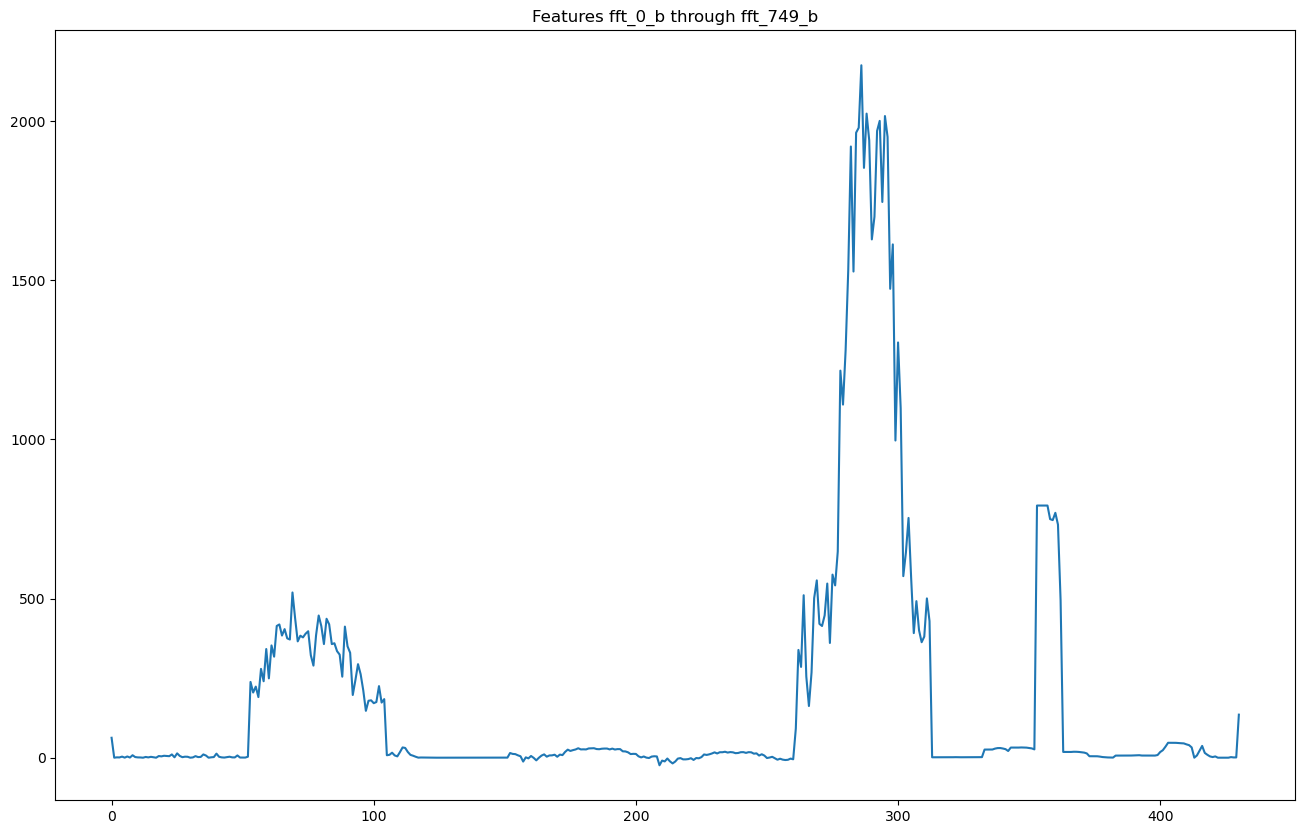

In [44]:
sample = data.loc[0, 'Yield':'S_surface4']

plt.figure(figsize=(16, 10))
plt.plot(range(len(sample)), sample)
plt.title("Features fft_0_b through fft_749_b")
plt.show()

In [45]:
data['Yield'].value_counts()

Yield
45.0    111
46.0    104
44.0     97
47.0     97
42.0     96
       ... 
68.6      1
73.6      1
69.5      1
67.7      1
33.9      1
Name: count, Length: 399, dtype: int64

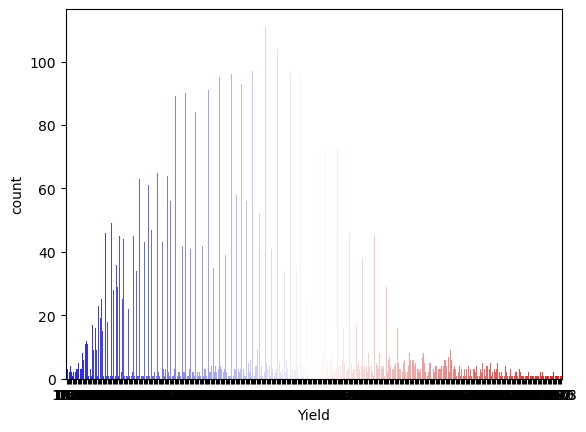

In [46]:
sns.countplot(x="Yield", data=data, palette="bwr")
plt.show()

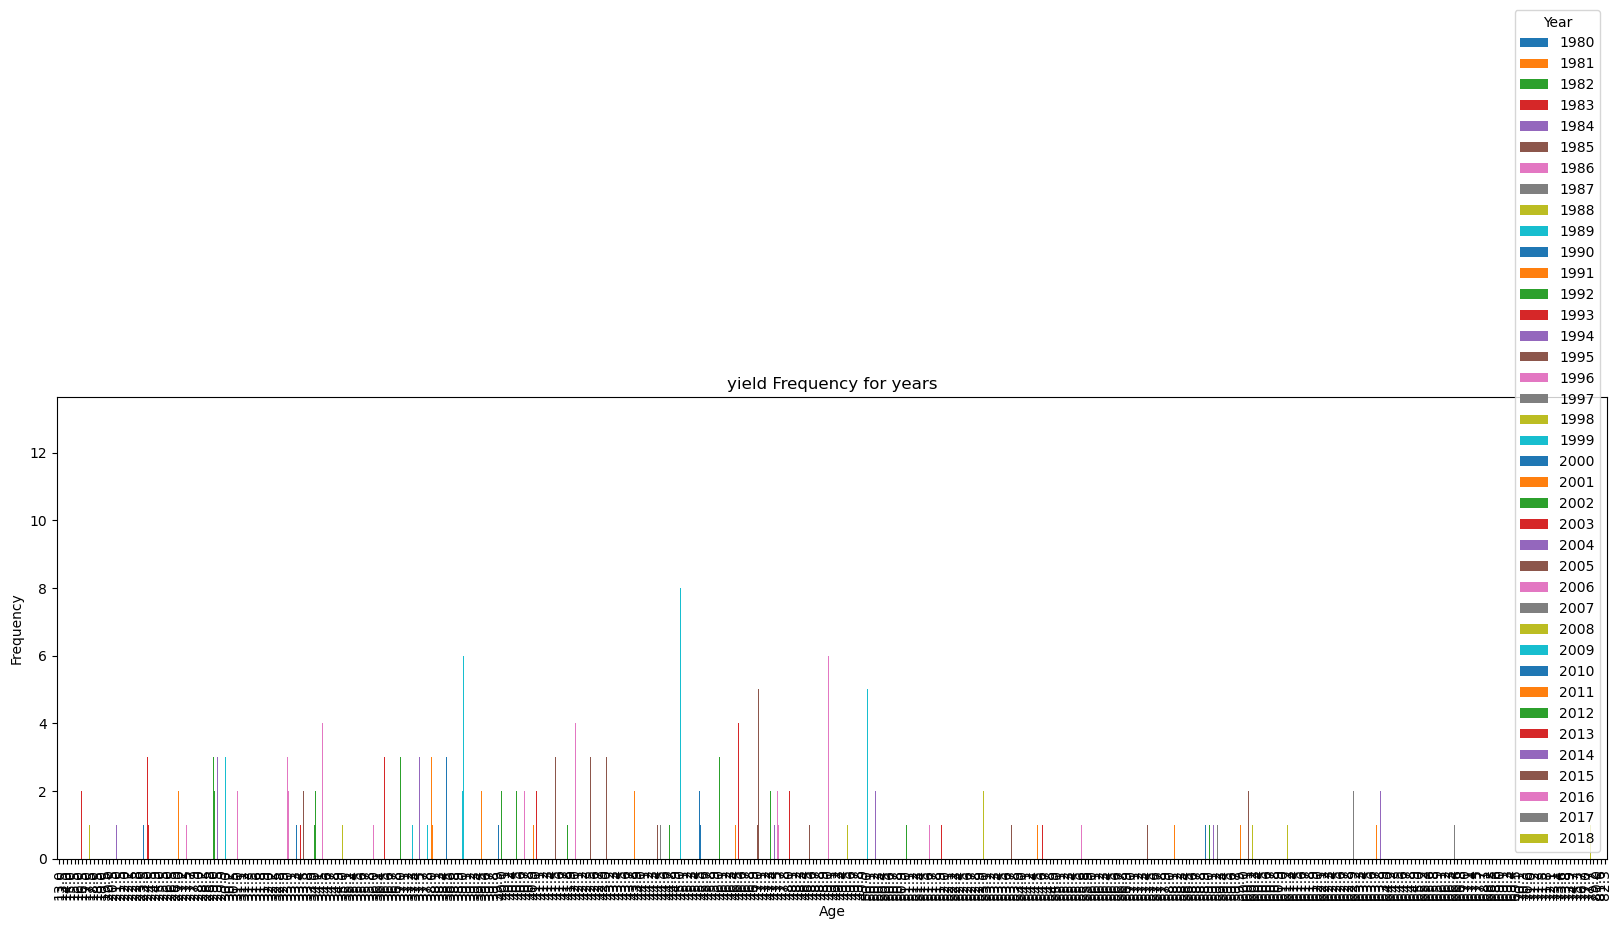

In [47]:
pd.crosstab(data.Yield,data.Year).plot(kind="bar",figsize=(20,6))
plt.title('yield Frequency for years')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('yield.png')
plt.show()

In [48]:
data.isnull().sum(axis=0)

Year          0
Loc_Id        0
Yield         0
W11           0
W12           0
             ..
P14           0
S_surface1    0
S_surface2    0
S_surface3    0
S_surface4    0
Length: 433, dtype: int64

In [49]:
data.columns


Index(['Year', 'Loc_Id', 'Yield', 'W11', 'W12', 'W13', 'W14', 'W15', 'W16',
       'W17',
       ...
       'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'S_surface1', 'S_surface2',
       'S_surface3', 'S_surface4'],
      dtype='object', length=433)

In [50]:
X = data[['Year', 'Loc_Id','W11', 'W12', 'W13', 'W14', 'W15','P9', 'P10', 'P11','S_surface1', 'S_surface2',
       'S_surface3', 'S_surface4']]
y = data['Yield']

In [51]:
X

,Year,Loc_Id,W11,W12,W13,W14,W15,P9,P10,P11,S_surface1,S_surface2,S_surface3,S_surface4
0,2018,1114,0.011905,1.059524,0.821429,3.369048,0.214286,4,0,0,1.816667,0.818167,0.824750,135.25
1,2017,1114,0.035714,1.297619,6.559524,0.619048,0.035714,4,0,0,1.816667,0.818167,0.824750,135.25
2,2016,1114,0.000000,2.214286,0.142857,0.333333,2.083333,6,0,0,1.816667,0.818167,0.824750,135.25
3,2015,1114,3.071429,0.678571,0.119048,0.416667,4.238095,2,1,2,1.816667,0.818167,0.824750,135.25
4,2014,1114,2.250000,2.821429,0.880952,0.797619,1.297619,2,2,0,1.816667,0.818167,0.824750,135.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,2008,104,2.089286,11.500000,0.000000,0.142857,5.196429,7,10,6,1.750000,0.745000,0.745125,134.75
3996,2007,104,2.750000,5.696429,4.303571,0.053571,0.035714,0,0,0,1.750000,0.745000,0.745125,134.75
3997,2006,104,0.607143,1.785714,2.696429,0.000000,2.785714,8,0,0,1.750000,0.745000,0.745125,134.75
3998,2005,104,10.303571,10.892857,0.250000,0.660714,1.303571,0,0,0,1.750000,0.745000,0.745125,134.75


In [52]:
#y.hvplot.hist(by='Yield', subplots=False, width=1000)

C:\Users\saikumaryangala\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


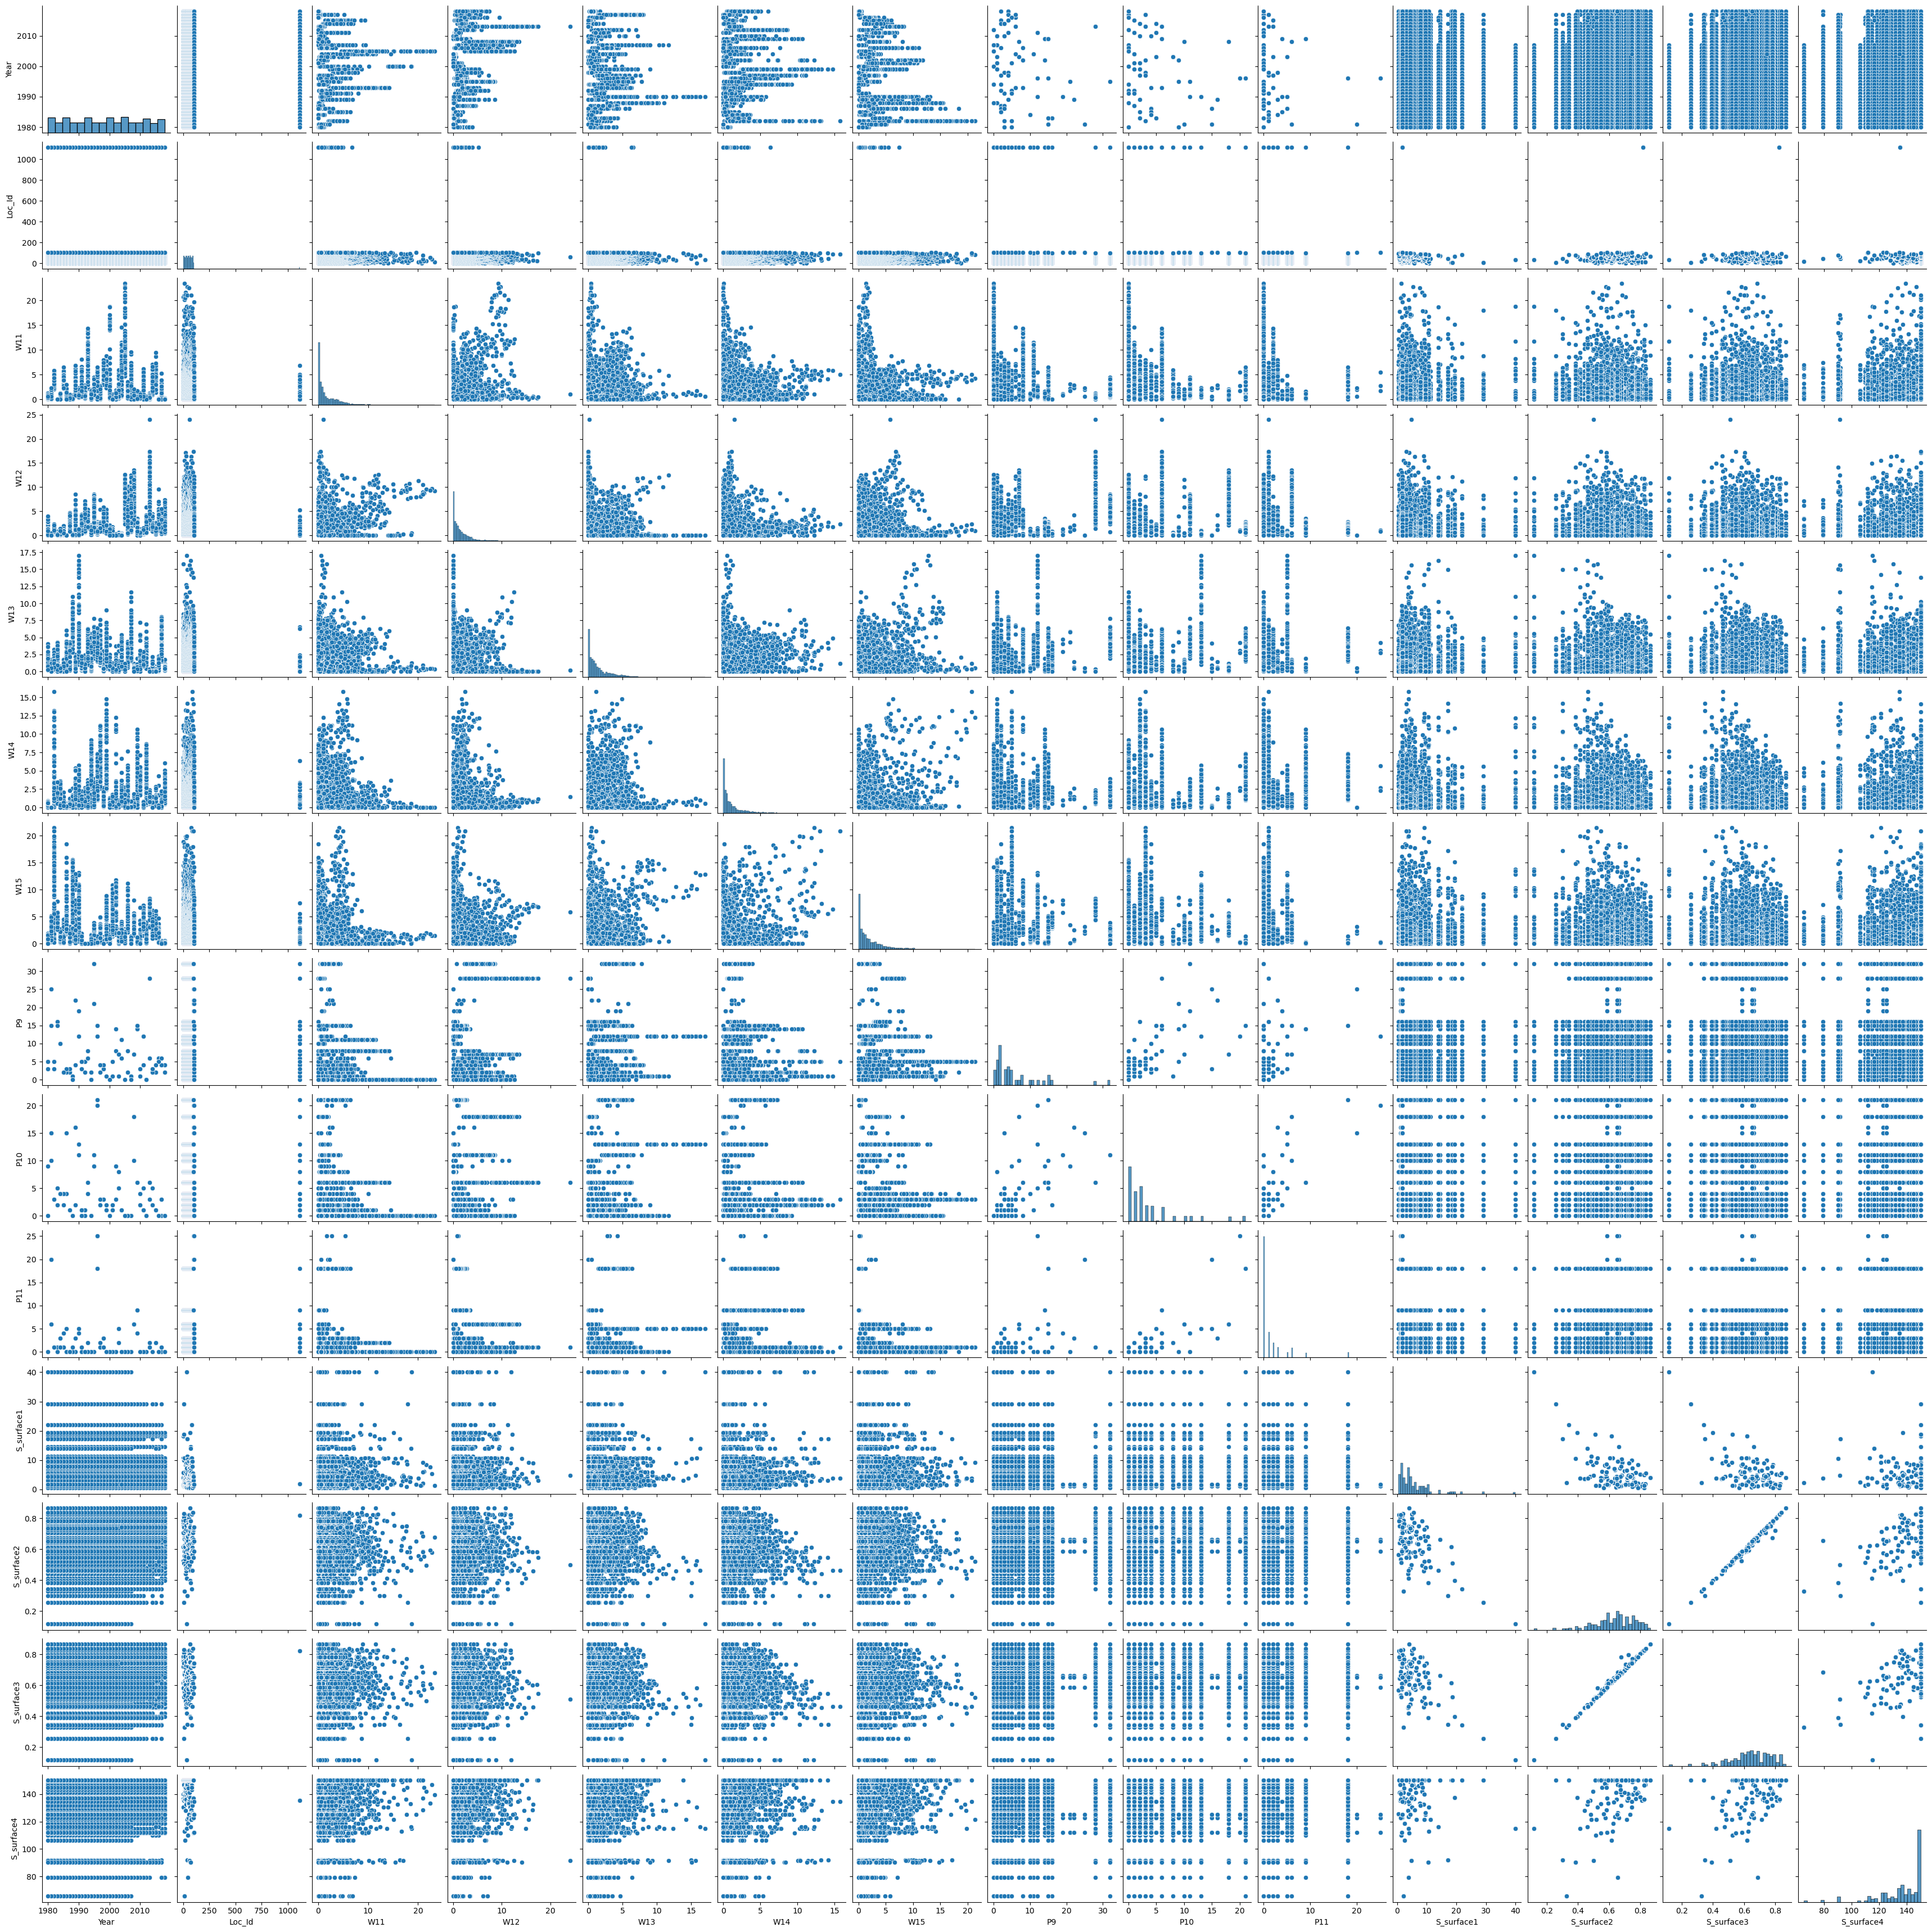

In [53]:
sns.pairplot(X)

In [54]:
y

0       62.6
1       53.6
2       67.5
3       61.2
4       60.0
        ... 
3995    53.5
3996    54.0
3997    54.7
3998    52.6
3999    52.5
Name: Yield, Length: 4000, dtype: float64

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=69)

In [56]:
from sklearn.model_selection import GridSearchCV

# Create a parameter grid to search over
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Perform a grid search
grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=10)
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters for Decision Tree:", grid_search.best_params_)

# Train the Decision Tree model with the best hyperparameters
best_dt_model = DecisionTreeRegressor(**grid_search.best_params_)
best_dt_model.fit(X_train, y_train)


Best Parameters for Decision Tree: {'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10}


C:\Users\saikumaryangala\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
270 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\saikumaryangala\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\saikumaryangala\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\saikumaryangala\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "

DecisionTreeRegressor(max_depth=15, max_features='log2', min_samples_split=10)

In [57]:
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data[['Year', 'Loc_Id', 'W11', 'W12', 'W13', 'W14', 'W15', 'P9', 'P10', 'P11', 'S_surface1', 'S_surface2', 'S_surface3', 'S_surface4']], data['Yield'], test_size=0.3, random_state=42)

base_models = [
    ('dt', DecisionTreeRegressor(random_state=42)),
    ('rf', RandomForestRegressor(random_state=42))
]

stacked_model = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())
stacked_model.fit(X_train, y_train)

# Calculate the R-squared (R²) score on the test data
r2_stacked = stacked_model.score(X_test, y_test)

# Calculate the correlation coefficient (r)
correlation_coefficient = np.sqrt(r2_stacked)

#print(f"R-squared of the stacked model: {r2_stacked:.2f}")
print(f"accuracy: {correlation_coefficient:.2f}")


accuracy: 0.91


In [58]:
!python -c "import sys; print(sys.executable)"


C:\Users\saikumaryangala\anaconda3\python.exe


In [59]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
print("this is the training score of the linear regression")
print(lr_model.score(X_train, y_train))

this is the training score of the linear regression
0.6238425538353307


In [60]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Create a Gradient Boosting Regressor model
gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)  # You can adjust the number of estimators as needed

# Fit the Gradient Boosting model to the training data
gb_regressor.fit(X_train, y_train)  # Assuming you have your training data (X_train, y_train)

# Make predictions on the test data
y_pred_gb = gb_regressor.predict(X_test)  # Assuming you have your test data (X_test)

# Calculate the R-squared (R²) score on the test data
r2_gb = r2_score(y_test, y_pred_gb)  # Assuming you have your test target values (y_test)

print("accuracy :", r2_gb)


accuracy : 0.822799788596285


In [61]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a KFold object for cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Define your Decision Tree model
model = DecisionTreeRegressor()

# Perform cross-validation and store the scores
cross_val_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')

# Calculate and print the mean R-squared score from cross-validation
mean_r2_score = cross_val_scores.mean()
print("Mean R-squared (cross-validation):", mean_r2_score)

# Now, train your model on the training set using DecisionTreeRegressor or any other model you prefer
model.fit(X_train, y_train)

Mean R-squared (cross-validation): 0.6552629360272612


DecisionTreeRegressor()

In [63]:
print('Accuracy is : ' , regressor.score(X_train, y_train))

Accuracy is :  1.0


In [64]:
# Calculate accuracy for Linear Regression
from sklearn.metrics import r2_score
y_pred_lr = lr_model.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)
print("R-squared (Linear Regression) on Test Data:", r2_lr)

R-squared (Linear Regression) on Test Data: 0.5946301956132407


In [65]:
import xgboost as xgb

In [66]:
import xgboost as xgb
from sklearn.metrics import r2_score

# Create and fit the XGBoost (XGBRegressor) model
xgb_r = xgb.XGBRegressor(objective='reg:linear', n_estimators=10, seed=123)
xgb_r.fit(X_train, y_train)  # Assuming you have your training data (X_train, y_train)

# Make predictions on the test data
y_pred_xgb = xgb_r.predict(X_test)  # Assuming you have your test data (X_test)

# Calculate the R-squared (R²) score
r2_xgb = r2_score(y_test, y_pred_xgb)  # Assuming you have your test target values (y_test)

print("R-squared (R²) score for XGBoost:", r2_xgb)


R-squared (R²) score for XGBoost: 0.8229596995068784


C:\Users\saikumaryangala\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [10:29:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


In [67]:
Result= regressor.predict(np.array([[2018,1114,0.011905,1.059524,0.821429,3.369048,0.214286,4,0,0,1.816667,0.818167,0.824750,135.25]]))

C:\Users\saikumaryangala\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [68]:
Result

array([65.8])

In [69]:
Result= regressor.predict(np.array([[2016,1114,0.000000,2.214286,0.142857,0.333333,2.083333,6,0,0,1.816667,0.818167,0.824750,135.25]]))

C:\Users\saikumaryangala\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [70]:
Result

array([67.5])

In [71]:
# Calculate accuracy for Decision Tree Regression
from sklearn.metrics import r2_score
y_pred_dt = regressor.predict(X_test)
r2_dt = r2_score(y_test, y_pred_dt)
print("R-squared (Decision Tree Regression) on Test Data:", r2_dt)

R-squared (Decision Tree Regression) on Test Data: 0.6494700439889409


In [72]:
# Calculate accuracy for XGBoost Regression
from sklearn.metrics import mean_squared_error
y_pred_xgb = xgb_r.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = 1 - (mse_xgb / np.var(y_test))
print("R-squared (XGBoost Regression) on Test Data:", r2_xgb)


R-squared (XGBoost Regression) on Test Data: 0.8229596995068784


In [73]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_filename = 'DT.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_filename, 'wb')
pickle.dump(regressor, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

In [74]:
!pip install -q hvplot

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

%matplotlib inline

# sns.set_style("whitegrid")
# plt.style.use("fivethirtyeight")

In [76]:
data = pd.read_csv('soyabean_data.csv')
data.head()

,Year,Loc_Id,Yield,W11,W12,W13,W14,W15,W16,W17,...,P9,P10,P11,P12,P13,P14,S_surface1,S_surface2,S_surface3,S_surface4
0,2018,1114,62.6,0.011905,1.059524,0.821429,3.369048,0.214286,3.797619,0.476190,...,4,0,0,0,0,0,1.816667,0.818167,0.82475,135.25
1,2017,1114,53.6,0.035714,1.297619,6.559524,0.619048,0.035714,1.964286,0.000000,...,4,0,0,0,0,0,1.816667,0.818167,0.82475,135.25
2,2016,1114,67.5,0.000000,2.214286,0.142857,0.333333,2.083333,0.119048,0.547619,...,6,0,0,0,0,0,1.816667,0.818167,0.82475,135.25
3,2015,1114,61.2,3.071429,0.678571,0.119048,0.416667,4.238095,0.023810,0.000000,...,2,1,2,1,2,2,1.816667,0.818167,0.82475,135.25
4,2014,1114,60.0,2.250000,2.821429,0.880952,0.797619,1.297619,1.095238,1.476190,...,2,2,0,0,0,0,1.816667,0.818167,0.82475,135.25


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Columns: 433 entries, Year to S_surface4
dtypes: float64(396), int64(37)
memory usage: 13.2 MB


In [78]:
data.isnull().sum(axis=0)

Year          0
Loc_Id        0
Yield         0
W11           0
W12           0
             ..
P14           0
S_surface1    0
S_surface2    0
S_surface3    0
S_surface4    0
Length: 433, dtype: int64

In [79]:
data.columns

Index(['Year', 'Loc_Id', 'Yield', 'W11', 'W12', 'W13', 'W14', 'W15', 'W16',
       'W17',
       ...
       'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'S_surface1', 'S_surface2',
       'S_surface3', 'S_surface4'],
      dtype='object', length=433)

In [80]:
X = data[['Year', 'Loc_Id','W11', 'W12', 'W13', 'W14', 'W15','P9', 'P10', 'P11','S_surface1', 'S_surface2',
       'S_surface3', 'S_surface4']]
y = data['Yield']

In [81]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [83]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [84]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
print('Accuracy is : ' , regressor.score(X_train, y_train))

Accuracy is :  1.0


In [85]:
test_pred = regressor.predict(X_test)
train_pred = regressor.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_1 = pd.DataFrame(data=[["DecisionTreeRegressor", *evaluate(y_test, test_pred) , cross_val(DecisionTreeRegressor())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])


Test set evaluation:
_____________________________________
MAE: 4.478166666666667
MSE: 36.595533333333336
RMSE: 6.049424215025207
R2 Square 0.6443976381699714
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.0
MSE: 0.0
RMSE: 0.0
R2 Square 1.0
__________________________________


In [86]:
import xgboost as xgb
xgb_r = xgb.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)
xgb_r.fit(X_train, y_train)
xgb_r.score(X_train, y_train)

C:\Users\saikumaryangala\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [10:29:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


0.8975013049911369

In [87]:
test_pred = xgb_r.predict(X_test)
train_pred = xgb_r.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["xgboost", *evaluate(y_test, test_pred) , cross_val(xgb.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123))]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

C:\Users\saikumaryangala\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [10:29:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
C:\Users\saikumaryangala\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [10:29:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Test set evaluation:
_____________________________________
MAE: 3.3216267175674434
MSE: 18.219463404847037
RMSE: 4.268426338224315
R2 Square 0.8229596995068784
__________________________________
Train set evaluation:
_____________________________________
MAE: 2.5080128058024815
MSE: 10.505359556304503
RMSE: 3.241197241191055
R2 Square 0.8975013049911369
__________________________________


C:\Users\saikumaryangala\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [10:29:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
C:\Users\saikumaryangala\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [10:29:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
C:\Users\saikumaryangala\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [10:29:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in fav

In [88]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1, 
              precompute=True, 
#               warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(X_train, y_train)
model.score(X_train, y_train)


0.5727131640457557

In [89]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_3 = pd.DataFrame(data=[["Lasso", *evaluate(y_test, test_pred) , cross_val(Lasso())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

Test set evaluation:
_____________________________________
MAE: 5.322843314338623
MSE: 46.55103679886706
RMSE: 6.8228320218855645
R2 Square 0.5476590413225194
__________________________________
Train set evaluation:
_____________________________________
MAE: 5.141130865818336
MSE: 43.79374630073958
RMSE: 6.6176843609180676
R2 Square 0.5727131640457557
__________________________________


In [90]:
from sklearn.linear_model import ElasticNet

model1 = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
model1.fit(X_train, y_train)
model1.score(X_train, y_train)

0.6161074406693462

In [91]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_4 = pd.DataFrame(data=[["ElasticNet", *evaluate(y_test, test_pred) , cross_val(ElasticNet())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

Test set evaluation:
_____________________________________
MAE: 5.322843314338623
MSE: 46.55103679886706
RMSE: 6.8228320218855645
R2 Square 0.5476590413225194
__________________________________
Train set evaluation:
_____________________________________
MAE: 5.141130865818336
MSE: 43.79374630073958
RMSE: 6.6176843609180676
R2 Square 0.5727131640457557
__________________________________


In [92]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
sgd_reg.fit(X_train, y_train)
sgd_reg.score(X_train, y_train)

0.6141422211996752

In [93]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_5 = pd.DataFrame(data=[["SGDRegressor", *evaluate(y_test, test_pred) , 0]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

Test set evaluation:
_____________________________________
MAE: 5.322843314338623
MSE: 46.55103679886706
RMSE: 6.8228320218855645
R2 Square 0.5476590413225194
__________________________________
Train set evaluation:
_____________________________________
MAE: 5.141130865818336
MSE: 43.79374630073958
RMSE: 6.6176843609180676
R2 Square 0.5727131640457557
__________________________________


In [94]:
result = pd.concat([results_df_1, results_df_2,results_df_3,results_df_4,results_df_5], axis=0)

In [95]:
result

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,DecisionTreeRegressor,4.478167,36.595533,6.049424,0.644398,0.593676
0,xgboost,3.321627,18.219463,4.268426,0.822960,0.758537
0,Lasso,5.322843,46.551037,6.822832,0.547659,0.475573
0,ElasticNet,5.322843,46.551037,6.822832,0.547659,0.479715
0,SGDRegressor,5.322843,46.551037,6.822832,0.547659,0.000000


In [101]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_filename = 'Dec_T.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_filename, 'wb')
pickle.dump(regressor, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

In [102]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
xgb_rfilename = 'xgb_r.pkl'
# Open the file to save as pkl file
xgb_rModel_pkl = open(xgb_rfilename, 'wb')
pickle.dump(xgb_r, xgb_rModel_pkl)
# Close the pickle instances
xgb_rModel_pkl.close()

In [103]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
modelfilename = 'Lasso.pkl'
# Open the file to save as pkl file
modelModel_pkl = open(modelfilename, 'wb')
pickle.dump(model, modelModel_pkl)
# Close the pickle instances
modelModel_pkl.close()

In [104]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
model1filename = 'Elasticnet.pkl'
# Open the file to save as pkl file
model1Model_pkl = open(model1filename, 'wb')
pickle.dump(model1, model1Model_pkl)
# Close the pickle instances
model1Model_pkl.close()

In [105]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
sgd_regfilename = 'sgd_reg.pkl'
# Open the file to save as pkl file
sgd_regModel_pkl = open(sgd_regfilename, 'wb')
pickle.dump(sgd_reg, sgd_regModel_pkl)
# Close the pickle instances
sgd_regModel_pkl.close()